In [13]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [14]:
image = Image.open("./dummy1.jpg")

In [15]:
data = np.array(image)

In [16]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

In [17]:
gray = rgb2gray(data)

In [59]:
binary = np.where(gray > np.max(gray) / 2, 0, 1)

In [64]:
# dilation example
def dilation_kxk_kernel(binary, k):
    row, col = binary.shape
    newbinary = np.zeros(binary.shape, dtype=np.int)
    for i in range(k, row - k):
        for j in range(k, col - k):
            if binary[i, j] == 0: continue
            newbinary[i-k:i+k, j-k:j+k] = 1
    return newbinary


In [65]:
newbinary = dilation_kxk_kernel(binary, 3)

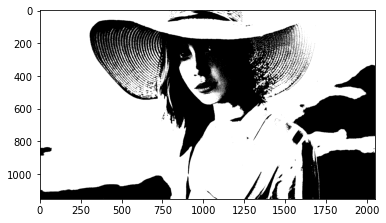

In [66]:
plt.imshow(binary, cmap='binary')

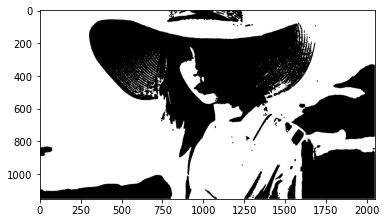

In [67]:
plt.imshow(newbinary, cmap='binary')

In [71]:
# erosion example
def erosion_kxk_kernel(binary, k):
    row, col = binary.shape
    newbinary = np.ones(binary.shape, dtype=np.int)
    for i in range(k, row - k):
        for j in range(k, col - k):
            if binary[i, j] == 1: continue
            newbinary[i-k:i+k, j-k:j+k] = 0
    return newbinary

In [72]:
newbinary2 = erosion_kxk_kernel(binary, 3)

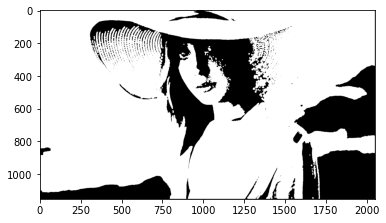

In [73]:
plt.imshow(newbinary2, cmap='binary')